# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - For Dataset-based questions, use the following '.csv' file Emission.csv and the data columns inside this file are 'CO2 Emission' (which denotes the Carbon Dioxide of a particular city) and 'Year' (corresponding Year-Month for the 'CO2 Emission' column).

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data as a monthly Time Series from the '.csv' file.

In [101]:
df = pd.read_csv("/Users/ishashukla/Downloads/Emission.csv")

## Here we will create a separate date range and then add it to the data instead of parsing the dates

In [102]:
df.head()

,Year-Month,CO2 Emission
0,1973-Jan,106.363
1,1973-Feb,101.760
2,1973-Mar,110.553
3,1973-Apr,104.734
4,1973-May,114.897


In [103]:
date = pd.date_range(start='1973-Jan', periods=len(df), freq='D')
date

DatetimeIndex(['1973-01-01', '1973-01-02', '1973-01-03', '1973-01-04',
               '1973-01-05', '1973-01-06', '1973-01-07', '1973-01-08',
               '1973-01-09', '1973-01-10',
               ...
               '1974-04-22', '1974-04-23', '1974-04-24', '1974-04-25',
               '1974-04-26', '1974-04-27', '1974-04-28', '1974-04-29',
               '1974-04-30', '1974-05-01'],
              dtype='datetime64[ns]', length=486, freq='D')

In [104]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

,Year-Month,CO2 Emission,Time_Stamp
0,1973-Jan,106.363,1973-01-01
1,1973-Feb,101.760,1973-01-02
2,1973-Mar,110.553,1973-01-03
3,1973-Apr,104.734,1973-01-04
4,1973-May,114.897,1973-01-05


In [105]:
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='Year-Month', axis=1, inplace=True)
df.head()

,CO2 Emission
Time_Stamp,
1973-01-01,106.363
1973-01-02,101.760
1973-01-03,110.553
1973-01-04,104.734
1973-01-05,114.897


Now, we have our data ready for the Time Series Analysis.

## Plot the Time Series to understand the behaviour of the data

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

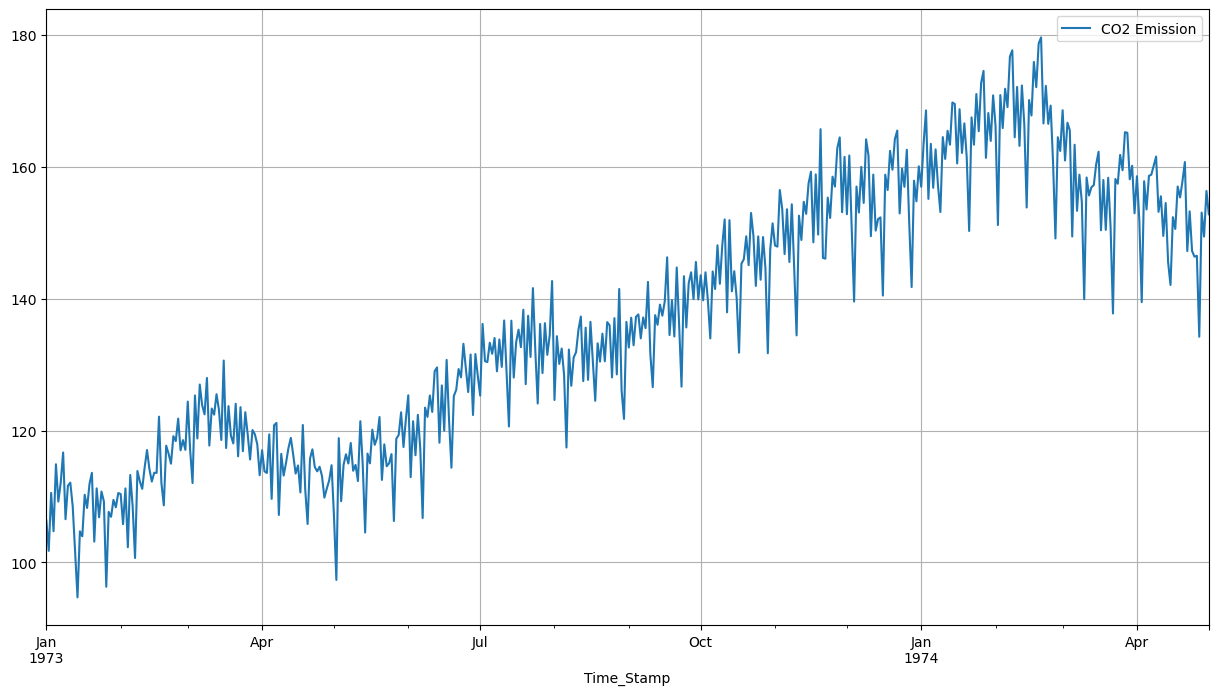

In [107]:
df.plot(grid=True);

## Check the basic measures of descriptive statistics of the Time Series

In [108]:
round(df.describe(),3)

,CO2 Emission
count,486.000
mean,136.958
std,19.857
min,94.699
25%,118.779
50%,135.994
75%,154.219
max,179.659


Remember, the above measure is independent of the Time Series aspect. As in, it does not take into account the Time Stamped data.

## Split the data into train and test and plot the training and test data. [20% of the most recent data should be in the test set]

In [109]:
train    =   df[0:int(len(df)*0.8)] ## First 80% of the data
test     =   df[int(len(df)*0.8):] # Last 20% of the data

In [110]:
print(train.shape)
print(test.shape)

(388, 1)
(98, 1)


In [111]:
from IPython.display import display

In [112]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,CO2 Emission
Time_Stamp,
1973-01-01,106.363
1973-01-02,101.760
1973-01-03,110.553
1973-01-04,104.734
1973-01-05,114.897


Last few rows of Training Data


,CO2 Emission
Time_Stamp,
1974-01-19,166.619
1974-01-20,161.372
1974-01-21,150.283
1974-01-22,167.523
1974-01-23,163.376


First few rows of Test Data


,CO2 Emission
Time_Stamp,
1974-01-24,171.070
1974-01-25,165.419
1974-01-26,172.746
1974-01-27,174.577
1974-01-28,161.380


Last few rows of Test Data


,CO2 Emission
Time_Stamp,
1974-04-27,134.243
1974-04-28,153.078
1974-04-29,149.442
1974-04-30,156.356
1974-05-01,152.814


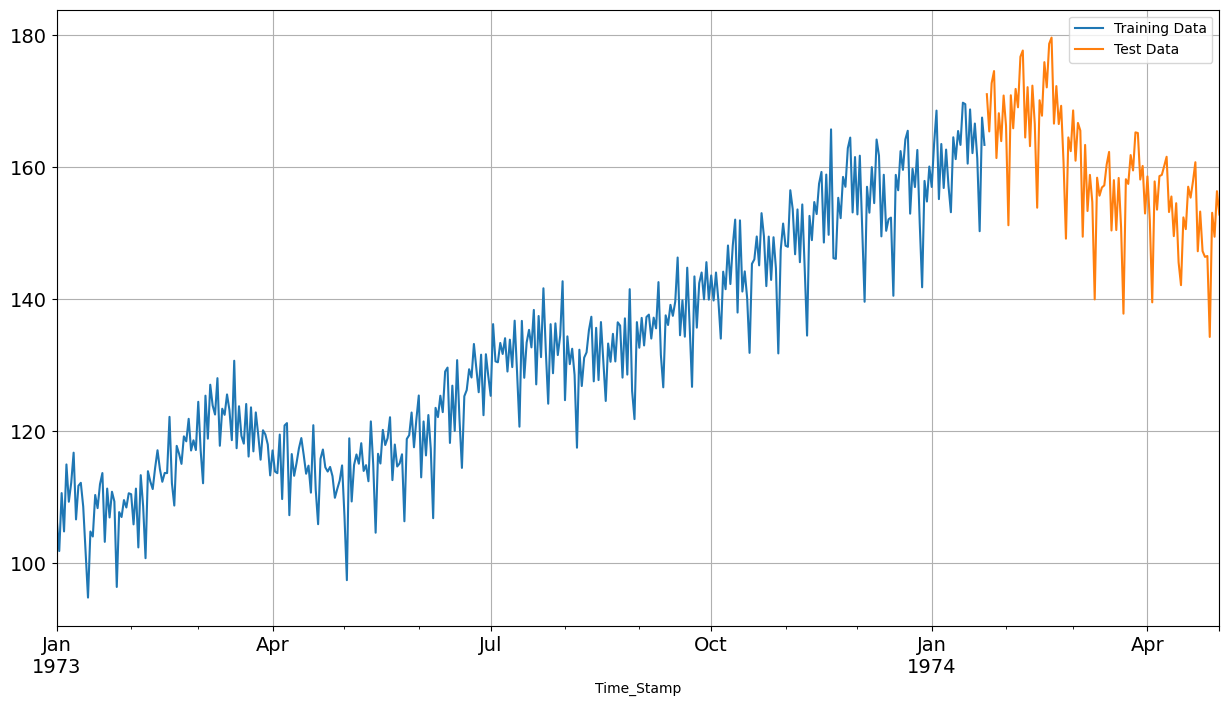

In [113]:
train['CO2 Emission'].plot(fontsize=14)
test['CO2 Emission'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [114]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [115]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [116]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,CO2 Emission,time
Time_Stamp,,
1973-01-01,106.363,1
1973-01-02,101.760,2
1973-01-03,110.553,3
1973-01-04,104.734,4
1973-01-05,114.897,5


Last few rows of Training Data


,CO2 Emission,time
Time_Stamp,,
1974-01-19,166.619,384
1974-01-20,161.372,385
1974-01-21,150.283,386
1974-01-22,167.523,387
1974-01-23,163.376,388


First few rows of Test Data


,CO2 Emission,time
Time_Stamp,,
1974-01-24,171.070,256
1974-01-25,165.419,257
1974-01-26,172.746,258
1974-01-27,174.577,259
1974-01-28,161.380,260


Last few rows of Test Data


,CO2 Emission,time
Time_Stamp,,
1974-04-27,134.243,349
1974-04-28,153.078,350
1974-04-29,149.442,351
1974-04-30,156.356,352
1974-05-01,152.814,353


Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['CO2 Emission'])

LinearRegression()

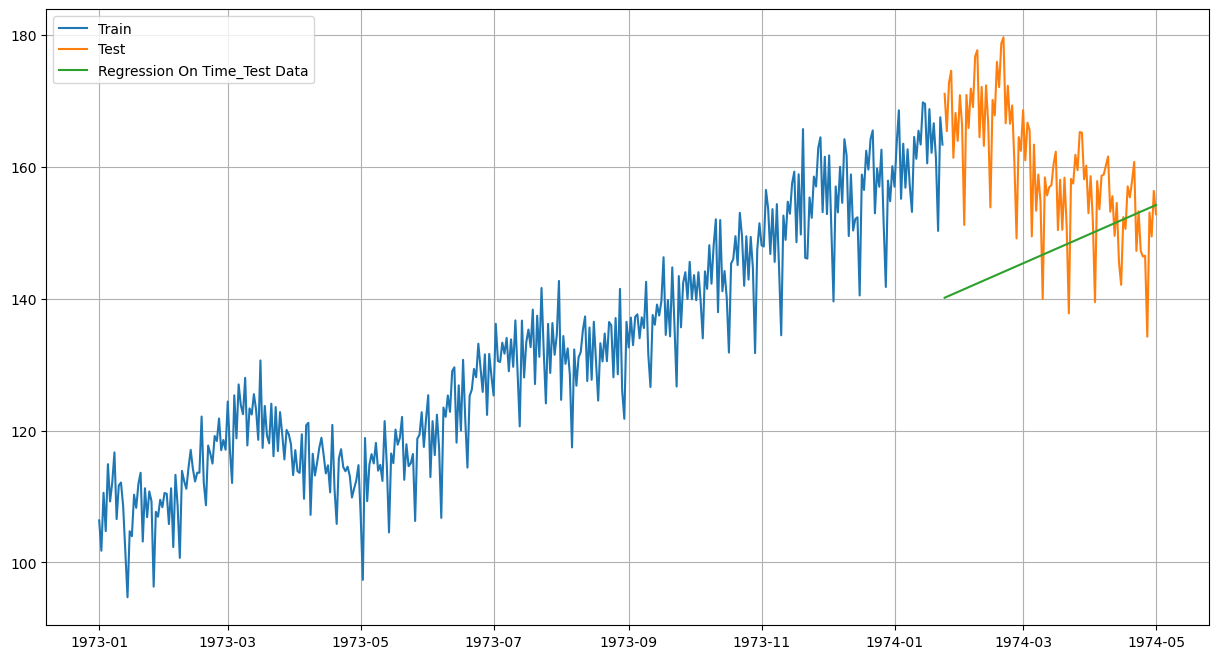

In [120]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [121]:
from sklearn import metrics

### Model Evaluation

In [122]:
rmse_model1_test = metrics.mean_squared_error(test['CO2 Emission'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.746 


In [123]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,17.746014


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [124]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [125]:
train.tail()

,CO2 Emission
Time_Stamp,
1974-01-19,166.619
1974-01-20,161.372
1974-01-21,150.283
1974-01-22,167.523
1974-01-23,163.376


In [126]:
NaiveModel_test['naive'] = np.asarray(train['CO2 Emission'])[len(np.asarray(train['CO2 Emission']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1974-01-24    163.376
1974-01-25    163.376
1974-01-26    163.376
1974-01-27    163.376
1974-01-28    163.376
Name: naive, dtype: float64

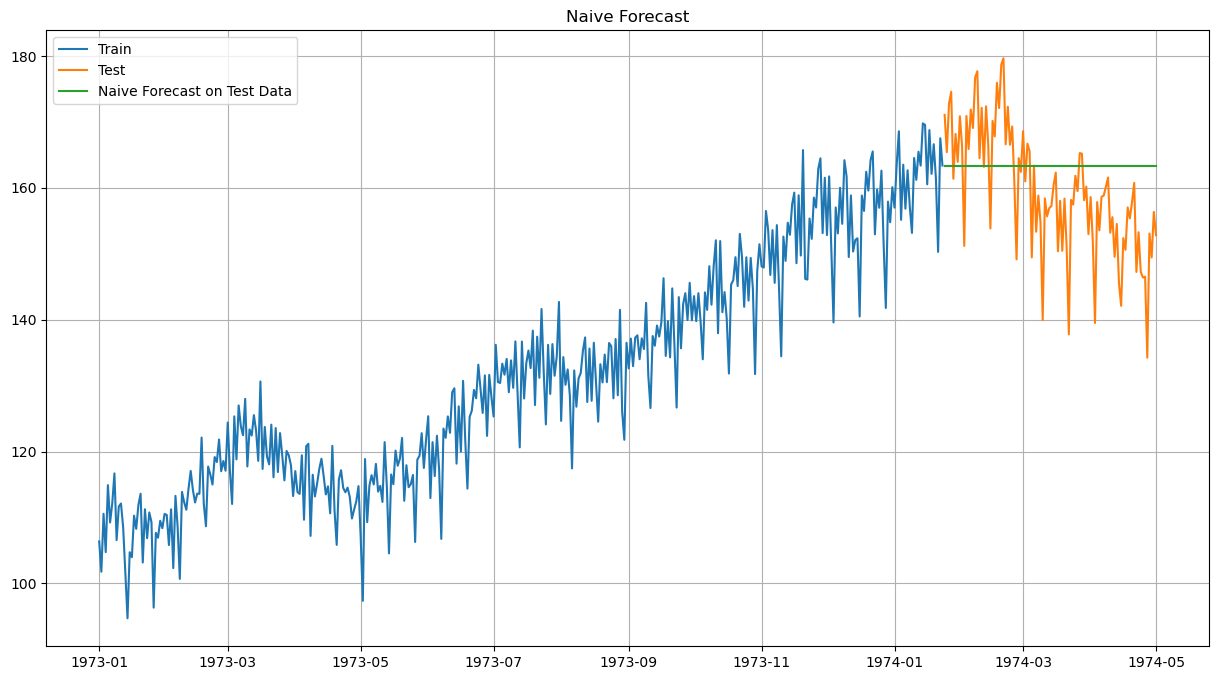

In [127]:
plt.plot(NaiveModel_train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [128]:
rmse_model2_test = metrics.mean_squared_error(test['CO2 Emission'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 10.159


In [129]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,17.746014
NaiveModel,10.159476


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [130]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [131]:
SimpleAverage_test['mean_forecast'] = train['CO2 Emission'].mean()
SimpleAverage_test.head()

,CO2 Emission,mean_forecast
Time_Stamp,,
1974-01-24,171.070,131.228523
1974-01-25,165.419,131.228523
1974-01-26,172.746,131.228523
1974-01-27,174.577,131.228523
1974-01-28,161.380,131.228523


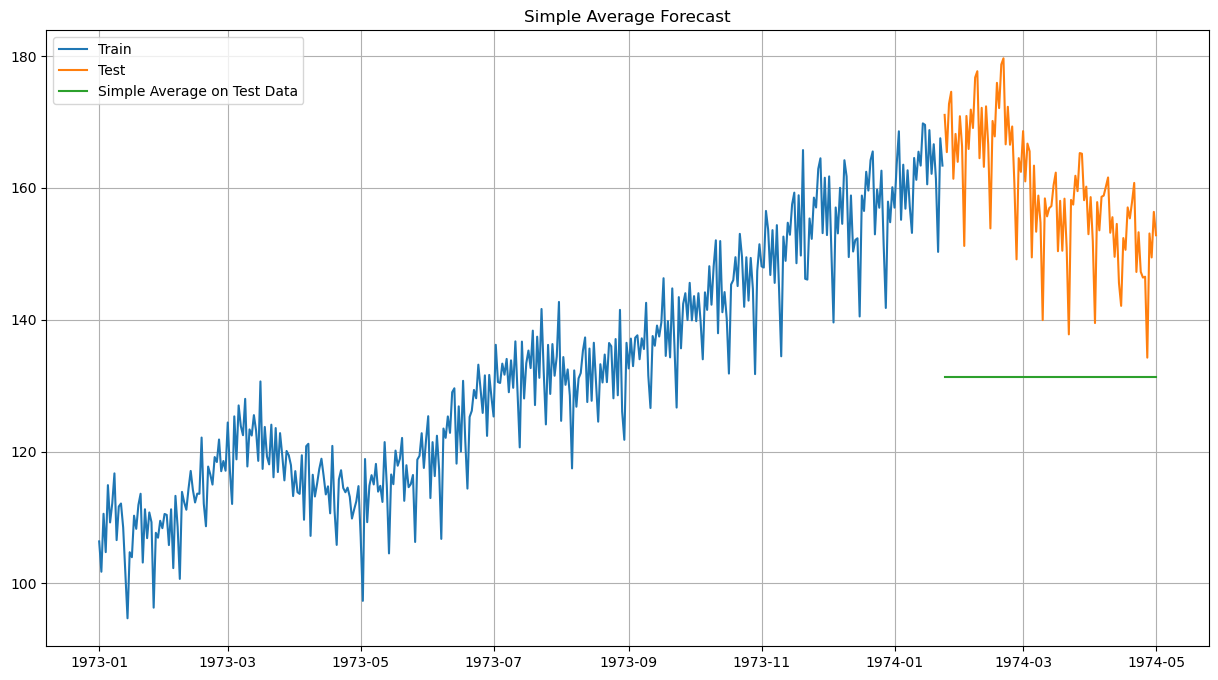

In [132]:
plt.plot(SimpleAverage_train['CO2 Emission'], label='Train')
plt.plot(SimpleAverage_test['CO2 Emission'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [133]:
rmse_model3_test = metrics.mean_squared_error(test['CO2 Emission'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 29.945


In [134]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,17.746014
NaiveModel,10.159476
SimpleAverageModel,29.944898


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [135]:
MovingAverage = df.copy()
MovingAverage.head()

,CO2 Emission
Time_Stamp,
1973-01-01,106.363
1973-01-02,101.760
1973-01-03,110.553
1973-01-04,104.734
1973-01-05,114.897


Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [158]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.8)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.8):]

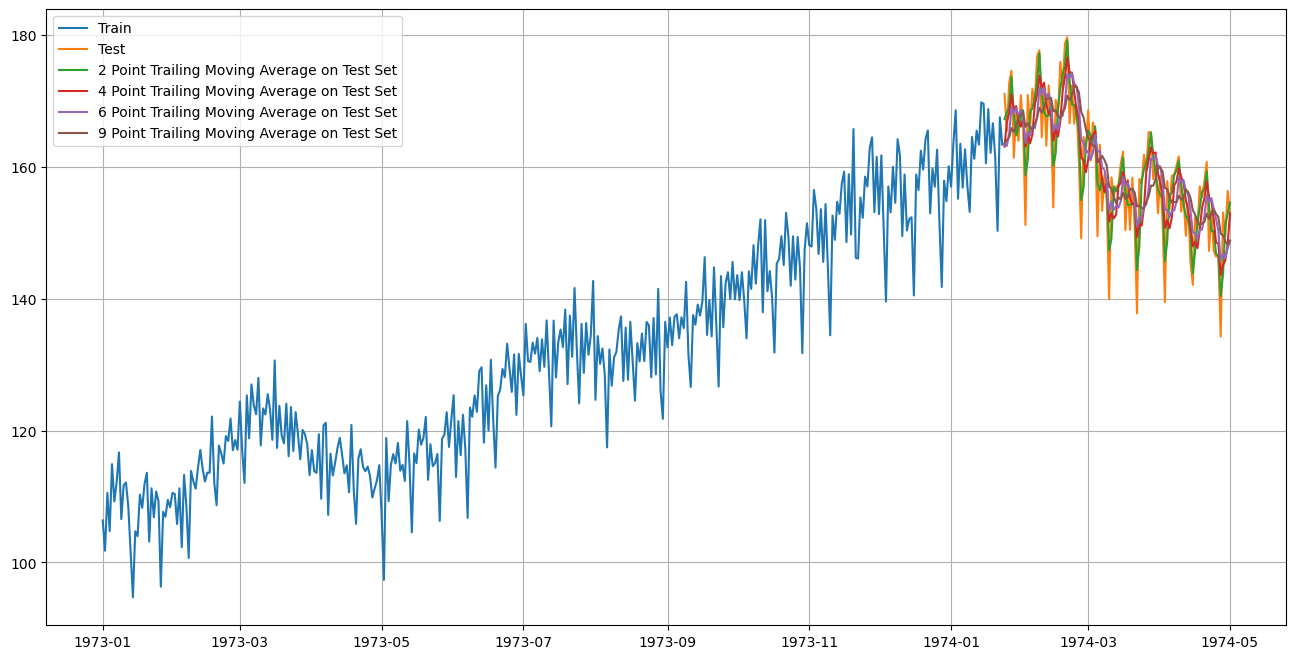

In [159]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['CO2 Emission'], label='Train')
plt.plot(trailing_MovingAverage_test['CO2 Emission'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [160]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 4.276
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 5.381
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 6.097
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 6.805


In [161]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,17.746014
NaiveModel,10.159476
SimpleAverageModel,29.944898
2pointTrailingMovingAverage,4.200082
4pointTrailingMovingAverage,5.242798
6pointTrailingMovingAverage,5.901887
9pointTrailingMovingAverage,6.573144
2pointTrailingMovingAverage,4.276399
4pointTrailingMovingAverage,5.381189
6pointTrailingMovingAverage,6.096596


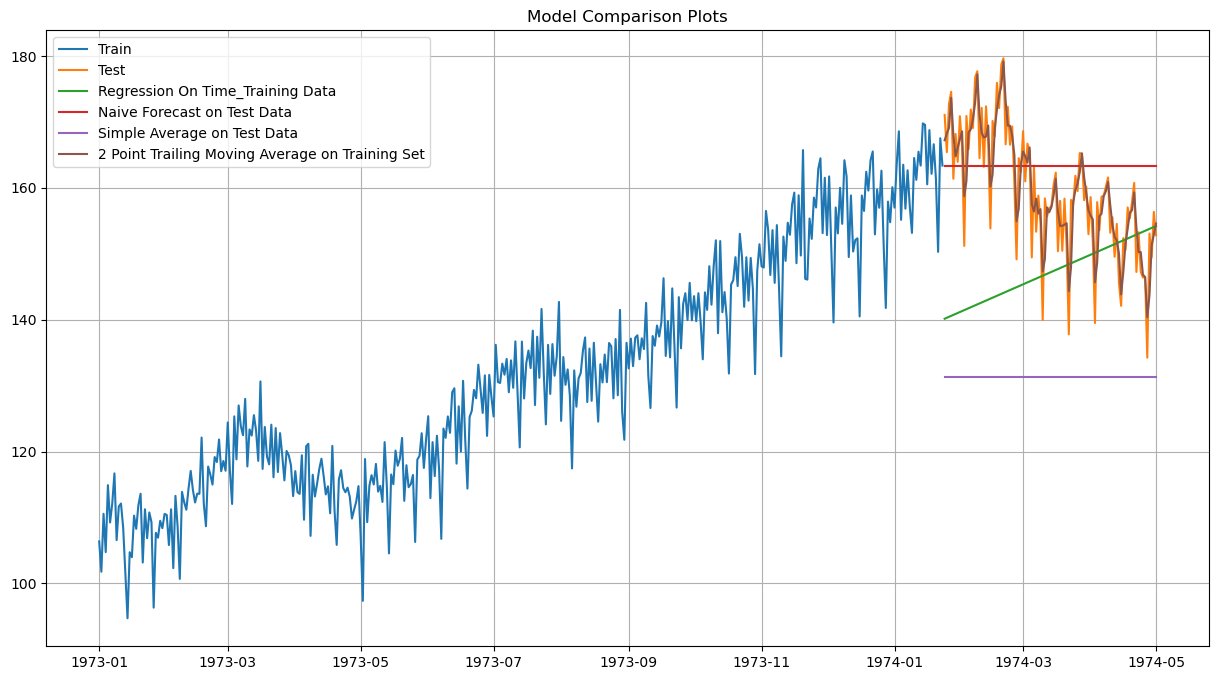

In [162]:
## Plotting on both Training and Test data

plt.plot(train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Simple Exponential Smoothing model

In [165]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
# Step 2: Build Simple Exponential Smoothing model
model = SimpleExpSmoothing(train, initialization_method='estimated')

# Step 3: Fit the model to the training data
model_fit = model.fit(optimized=True)

# Step 4: Predict on the test data
predictions = model_fit.forecast(len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Print RMSE rounded to 4 decimal places
print("Root Mean Squared Error (RMSE): {:.5f}".format(rmse))

Root Mean Squared Error (RMSE): 9.92237


/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Double Exponential Smoothing

In [163]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

model = ExponentialSmoothing(train, initialization_method='estimated', trend='add')

# Step 3: Fit the model to the training data
model_fit = model.fit(optimized=True)

# Step 4: Predict on the test data
predictions = model_fit.forecast(len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Print RMSE rounded to 4 decimal places
print("Root Mean Squared Error (RMSE): {:.5f}".format(rmse))


Root Mean Squared Error (RMSE): 22.40402


/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Simple Exponential Smoothing model with log

In [164]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df is your DataFrame containing the time series data

# Step 1: Split data into train and test
train = df.iloc[:int(len(df) * 0.8)]  # First 80% of the data
test = df.iloc[int(len(df) * 0.8):]   # Last 20% of the data

# Step 2: Take logarithm on both training and test data
train_log = np.log(train)
test_log = np.log(test)

# Step 3: Build Simple Exponential Smoothing model
model = SimpleExpSmoothing(train_log, initialization_method='estimated')

# Step 4: Fit the model to the training data
model_fit = model.fit(optimized=True)

# Step 5: Predict on the test data
predictions_log = model_fit.forecast(len(test_log))

# Step 6: Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_log, predictions_log))

# Print RMSE rounded to 4 decimal places
print("Root Mean Squared Error (RMSE): {:.5f}".format(rmse))


Root Mean Squared Error (RMSE): 0.06295


/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
